# Regresión Lineal Simple

La idea de usar regresión lineal simple es ajustar los datos a un modelo de la forma

$$\hat{y} = \theta_0 + \theta_1 x$$

eligiendo aquella recta que minimice el error cuadrático medio entre el valor real $y_i$ y el valor que predice la recta $\hat{y}$:
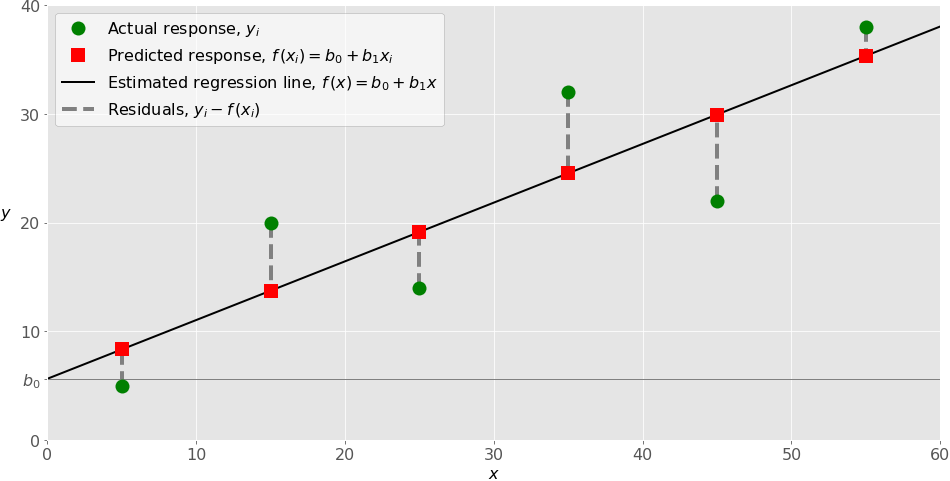

Al final, los parámetros que resuelven el problema de optimización son:

$$\theta_0 = \bar{y}-\theta_1 \bar{x}$$
$$\theta_1 = \frac{\sum x_i(y_i - \bar{y})}{\sum x_i(x_i - \bar{x})}$$

Vamos a empezar importando las librerías necesarias para implementar nuestro programa:
- `Numpy` para el cálculo numérico
- `pandas` para manejar los datos y,
- `matplotlib` para graficar.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Después, vamos a cargar nuestros datos con `pandas` en un dataframe desde un archivo csv.

In [ ]:
data = pd.read_csv('chirp_dataset.csv') # se carga el archivo csv
x = data['chirps'] # a la variable x se le asigna la columna
y = data['temperature'] # a la variable y se le asigna la columna

Para visualizar que todo se cargó bien, vamos a utilizar la función `head`de pandas para ver los primeros cinco elementos del dataframe.

In [ ]:
print(data.head())

      chirps  temperature
0  20.000000         88.6
1  16.000000         71.6
2  19.799999         93.3
3  18.400000         84.3
4  17.100000         80.6


Para ver la forma que tienen los datos, vamos a realizar una gráfica de dispersión sencilla.

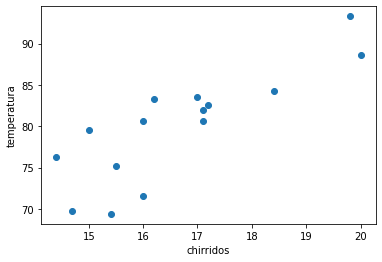

In [ ]:
plt.scatter(x,y)
plt.ylabel('temperatura')
plt.xlabel('chirridos')
plt.show()

Llegó el momento de calcular los coeficientes de $\theta_0$ y $\theta_1$:

In [ ]:
def linear_regression(x, y):
  # para calcular las medias de x y y
  x_mean = x.mean()
  y_mean = y.mean()

  theta_1_num = ((x - x_mean) * (y - y_mean)).sum()
  theta_1_den = ((x - x_mean)**2).sum()
  theta_1 = theta_1_num / theta_1_den

  theta_0 = y_mean - (theta_1*x_mean)

  regression_line = 'y = {} + {}x'.format(theta_0, round(theta_1, 3))

  return (theta_0, theta_1, regression_line)

In [ ]:
theta_0, theta_1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)

Regression Line:  y = 25.23230990146709 + 3.291x


Ahora, vamos a graficar la recta con los coeficientes generados.

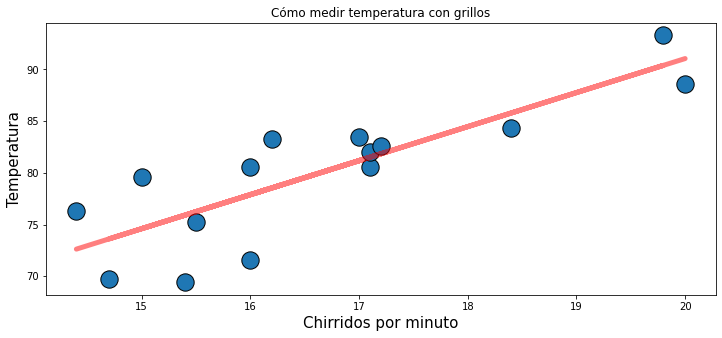

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=300, linewidths=1, edgecolor='black')
plt.title('Cómo medir la temperatura con grillos')
plt.xlabel('Chirridos por minuto', fontsize=15)
plt.ylabel('Temperatura', fontsize=15)
plt.plot(x, theta_0 + theta_1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')

**Ejercicio**: hagan una función para predecir la temperatura según un nuevo valor de $x$.

In [ ]:
def predict(theta_0, theta_1, x):
  y = theta_0 + theta_1 * x
  return y

**Práctica de laboratorio #1**: Determinar la recta que se ajusta a los datos del conjunto de datos disponible en la siguiente liga:
https://data.world/anujonthemove/auto-insurance-in-sweden

**Práctica de laboratorio #2**: implementar el algoritmo de regresión lineal simple con la librería `scikit-learn` con los datos que se manejaron en clase.